<a href="https://colab.research.google.com/github/aidanmwood/data-analysis/blob/main/QuadFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a function that takes as input two lists of numeric data and computes the least squares

coefficients for a quadratic fit of the data. You will need to form the 3X3 matrix and the 3X1 column vector shown
and on the previous slide. Use the same function that you used before when performing a linear least squares fit
to invert the matrix and multiple the column vector. Use the data below to test your function.

Write a function that plots the set of points used for the fit, the least squares fit and the error bars
based on the fit residuals. Use the data below to test your code. Approximate values for the least squares
quadratic coefficients and a figure showing what the plot should look like are provided below.

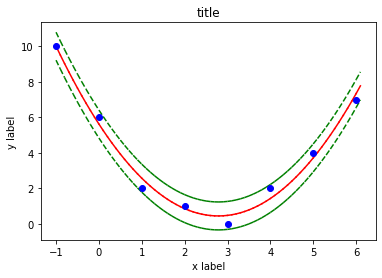

In [22]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math

# Test data sets
x = [-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0]
y = [10.0,6.0,2.0,1.0,0.0,2.0,4.0,7.0]

# Calculates the LS coefficients for quadratic fit
def quad_fit(x, y):
  # Sums the x and y lists
  sumx = sum(x)
  sumy = sum(y)

  # Creates empty lists
  x2 = []
  x3 = []
  x4 = []
  yx = []
  yx2 = []

  # adds appropriate values to some of the lists
  for i in x:
    x2.append(i**2)
    x3.append(i**3)
    x4.append(i**4)

  # adds appropriate vals to other lists
  for i in range(len(x)):
    yx2.append(y[i]*(x[i]**2))
    yx.append(y[i]*x[i])

  # finds sum of the newly filled lists
  sumx2 = sum(x2)
  sumx3 = sum(x3)
  sumx4 = sum(x4)
  sumyx2 = sum(yx2)
  sumyx = sum(yx)

  # Creates the matricies
  mat3x3 = [[sumx4, sumx3, sumx2], [sumx3, sumx2, sumx], [sumx2, sumx, len(x)]]
  mat1x3 = [[sumyx2], [sumyx], [sumy]]

  # Computes the coefficients
  mat_inv = np.linalg.inv(mat3x3)
  coeffs = np.matmul(mat_inv, mat1x3)

  return coeffs

# # Computes the residuals, residual mean, and residual standard deviation
def residuals(x, y, coeffs):
  res = []

  for i in range(len(x)):
    i_res = y[i] - (coeffs[0][0] * x[i]**2 + coeffs[1][0]*x[i] + coeffs[2][0])
   
    res.append(i_res)
  res_mean = mean(res)
  res_std = stand_dev(res)

  return res, res_mean, res_std

# mean
def mean(data):
  data_sum = sum(data)
  return data_sum / len(data)

# Standard Deviation
def stand_dev(data):
  return math.sqrt(variance(data))

# variance
def variance(data):
  sqr_data = []

  for val in data:
    sqr_data.append(val**2)

  variance = 1/len(data) * sum(sqr_data) - (1/len(data) * sum(data))**2
  return variance

def best_fit_line(x, y, coeffs):
  x1 = min(x)
  y1 = coeffs[0][0] * x1 + coeffs[1][0]
  x2 = max(x)
  y2 = coeffs[0][0] * x2 + coeffs[1][0]

  x_vals = [x1, x2]
  y_vals = [y1, y2]

  return x_vals, y_vals

def plot_data_and_fit(x, y, coeffs, lower_bound, upper_bound):
  x_vals, y_vals = best_fit_line(x, y, coeffs)
  
  plt.plot(x, y, 'x')
  plt.plot(x_vals, [y_vals[0]+upper_bound, y_vals[1]+upper_bound], '--')
  plt.plot(x_vals, [y_vals[0]+lower_bound, y_vals[1]+lower_bound], '--')
  plt.plot(x_vals, y_vals)

#  graphs the quadratic fit
def quad_fit_graph(x, y, x_label, y_label, title, ifit):
  # Gets the LS coefficients from the quad_fit function
  coeffs = quad_fit(x, y)
  res, res_mean, res_std = residuals(x, y, coeffs)

  ndevs = 2
  lb_constant = res_mean - ndevs*res_std
  ub_constant = res_mean + ndevs*res_std

  i = min(x)

  while i < max(x):
    x1 = i
    y1 = coeffs[0][0]*x1**2 + coeffs[1][0]*x1 + coeffs[2][0]

    x2 = i + .1
    y2 = coeffs[0][0]*x2**2 + coeffs[1][0]*x2 + coeffs[2][0]

    plt.plot([x1, x2], [y1, y2], "-r")
    plt.plot([x1, x2], [y1 + lb_constant, y2 + lb_constant], "--g")
    plt.plot([x1, x2], [y1 + ub_constant, y2 + ub_constant], "--g")

    i = x2

  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.plot(x, y, 'ob')
  plt.show()

quad_fit_graph(x, y, 'x label', 'y label', 'title', 1)
print()